# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.decomposition import PCA

## Load the Data

In [316]:
df = pd.read_csv("Traffic_Accident.csv")
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [318]:
df.shape

(52000, 30)

In [319]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [320]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [321]:
df.sample(15)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
14754,9002,200501KF60452,539040.0,184210.0,0.003493,51.539618,1,3,2.0,1,...,112.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01003619,2005.0
39887,15849,200501RY10025,546220.0,172750.0,0.102210,51.434830,1,3,NaN,3,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01000462,2005.0
11425,92064,200522EB33745,350080.0,248410.0,-2.730730,52.131691,22,3,2.0,4,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01014100,2005.0
6090,42885,200506J033083,389280.0,388860.0,-2.162687,53.396448,6,3,2.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01005760,2005.0
26207,34413,200505AA04260,335060.0,381240.0,-2.976448,53.324069,5,2,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,E01007171,2005.0
17595,15579,200501RG40620,543250.0,174440.0,0.060195,51.450775,1,3,2.0,1,...,211.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01001615,2005.0
51185,18599,200501TE00044,520540.0,177930.0,-0.265273,51.487428,1,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01002577,2005.0
15072,34356,200505AA03407,329910.0,380320.0,-3.053551,53.315143,5,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,2.0,Yes,E01007144,2005.0
24928,21235,200501WW50210,525690.0,174740.0,-0.192270,51.457638,1,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01004509,2005.0
32393,29760,200504BA05082,347960.0,460650.0,-2.796144,54.039191,4,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01025147,2005.0


In [322]:
df.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [323]:
for col in df.columns:
  print(df[col].name)
  print(df[col].unique())

Unnamed: 0
[88245 78422 19574 ...   437 61353 75359]
Accident_Index
['2.01E+12' '200520D303703' '200501TX20137' ... '20053102C2156'
 '200501BS70452' '2005160D02810']
Location_Easting_OSGR
[381880. 413520. 516260. ... 460040. 511930. 509970.]
Location_Northing_OSGR
[298700. 284740. 177370. ... 452300. 245160. 515740.]
Longitude
[-2.268891 -1.802453 -0.327073 ... -0.178465 -1.591972 -0.334114]
Latitude
[52.585773 52.460412 51.48329  ... 51.482604 54.068547 53.740566]
Police_Force
[21 20  1 14 31  4  3 30  5  6 13 22 48  7 12 16 10 11 32 23 17]
Accident_Severity
[3 2 1]
Number_of_Vehicles
[ 2.  1.  3. nan  4.  5.  8.  6.  7.  9. 18. 11. 10.]
Number_of_Casualties
[ 2  1  3  7  5  4  6  8  9 10 11 13 14 23 17 16]
Date
['24/04/2005' '08/10/2005' '02/04/2005' '26/05/2005' '11/01/2005'
 '17/11/2005' '06/10/2005' '19/12/2005' '07/10/2005' '17/03/2005'
 '31/05/2005' '05/05/2005' '04/06/2005' '23/11/2005' '10/04/2005'
 '23/08/2005' '31/03/2005' '12/12/2005' '17/12/2005' '14/11/2005'
 '23/12/2005'

In [324]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [325]:
def remove_outliers(data):
  for i in data.columns:
    if data[i].dtype == "number":
      Q1 = data[i].quantile(0.25)
      Q3 = data[i].quantile(0.75)
      IQR = Q3 - Q1
      data = data[~((data[i] < (Q1 - 1.5 * IQR)) | (data[i] > (Q3 + 1.5 * IQR)))]
  return data

df = remove_outliers(df)

In [326]:
for col in df.columns:
  df[col] = df[col].replace(np.nan,df[col].mode()[0])
  df[col] = df[col].fillna(df[col].mode()[0])


In [327]:
label_encoder = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = label_encoder.fit_transform(df[[col]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [328]:
minmax= MinMaxScaler()
numerical_df = df.select_dtypes(exclude=['object'])
categorical_df = df.select_dtypes(include=['object'])

scaled_df = minmax.fit_transform(numerical_df)
scaled_df = pd.DataFrame(numerical_df, columns=df.columns)


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [329]:
df.drop(['Unnamed: 0','Accident_Index','Date','Year','Time',], axis =1, inplace=True)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            52000 non-null  int64  
 6   Number_of_Vehicles                           52000 non-null  float64
 7   Number_of_Casualties                         52000 non-null  int64  
 8   Day_of_Week                                  52000 non-null  float64
 9   Local_Authority_(District)                   52000 non-null  float64
 10

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<ipython-input-332-510ebf0e82b0>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df['Longitude'], y=df['Latitude'], cmap='virdis')


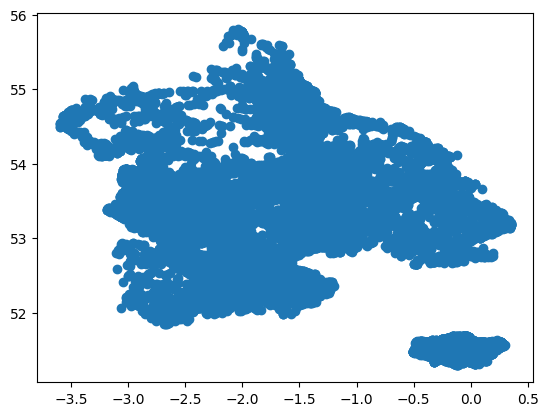

In [332]:
plt.scatter(x=df['Longitude'], y=df['Latitude'], cmap='virdis')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [333]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df)

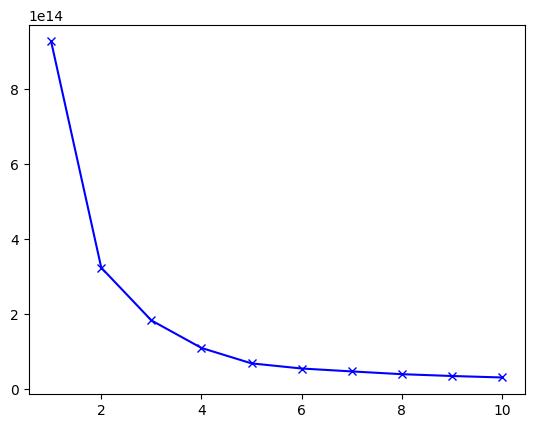

In [344]:
inert = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_pca)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert,'bx-')
plt.show()

In [367]:
kmeans = KMeans(n_clusters=2,init='k-means++', max_iter=50, n_init=10, random_state=42)
kmeans.fit(df_pca)
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [356]:
silhouette = silhouette_score(df_pca, clusters)
print(silhouette)

0.6203586274615026


## Plot the data points with their predicted cluster center

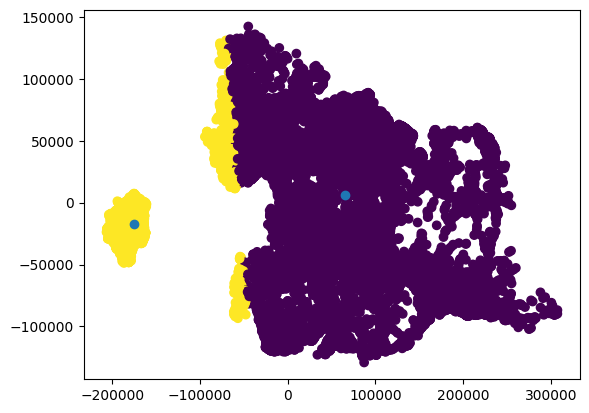

In [368]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

***Answers:::::***

**Justify Your Feature Selection:**
 * used most of the features except
 'Unnamed: 0'
 'Accident_Index'
 'Date'
 'Year'
 'Time'
 some of them just idexes and don't have meaning for the data
 and because of the time, didn't have the time to analyze all of them
 **Number of Clusters Choices:**
   - How did you determine the optimal number?
   * i used Elbow + silhouette metrics to determine the best number between clusters
   Clusters and Silhouette Outputs From Testing:
   2 Clusters -> 0.62
   3 Clusters -> 0.53
   4 Clusters -> 0.58

**Evaluation:**
* used metrics and methods: Elbow, silhouette
* measures the similarity of a data point within its cluster compared to other clusters , in short aid in assessment of clustering performance.

**Improvements and Recommendations:**
* You can try using DBSCAN, or HierarchicalDBSCAN and test the outputs

